### Урок 1. Введение в спортивный анализ данных, Exploration Data Analysis.

Задание 1:<br>
1. Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;<br>
2. Сделать базовый анализ целевой переменной, сделать выводы;<br>
3. Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;<br>
4. Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;<br>
5. Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?<br>
6. Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.<br>
7. Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.<br>
<br>
Ссылка на наборы данных: https://drive.google.com/file/d/1j8zuKbI-PW5qKwhybP4S0EtugbPqmeyX/view?usp=sharing
<br>
p.s. это обязательная программа для выполнения домашки, вы можете расширить эту программу и сделать больше; я только за :)

## Решение:

In [1]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

## Базовый анализ данных

In [2]:
# Загрузим датасет
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


In [3]:
# Посмотрим на базовые статистики по набору данных
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [4]:
# Посмотрим на первые 5 строк датасета
train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [5]:
# Посмотрим на числовые признаки
numerical_features = train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

numerical_features.columns

count of numeric_features 201


Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [6]:
numerical_features.head(n=2)

target    var_0   var_1    var_2  var_3    var_4   var_5   var_6    var_7  \
0       0   8.9255 -6.7863  11.9081  5.093  11.4607 -9.2834  5.1187  18.6266   
1       0  11.5006 -4.1473  13.8588  5.389  12.3622  7.0433  5.6208  16.5338   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  

[2 rows x 201 columns]

### Дискретные числовые признаки

In [7]:
discrete_feature = [
    feature for feature in numerical_features
    if len(train[feature].unique())<25 
]

print(f"Discrete Variables Count: {len(discrete_feature)}")

Discrete Variables Count: 1


In [8]:
discrete_feature

['target']

In [9]:
# Только целевая переменная является дискретной

### Непрерывные числовые признаки

In [10]:
continuous_feature = [
    feature for feature in numerical_features
    if feature not in discrete_feature]

print(f"Continuous Feature Count {len(continuous_feature)}")

Continuous Feature Count 200


In [11]:
# Все остальные признаки являются непрерывными (ID_code - исключаем) 

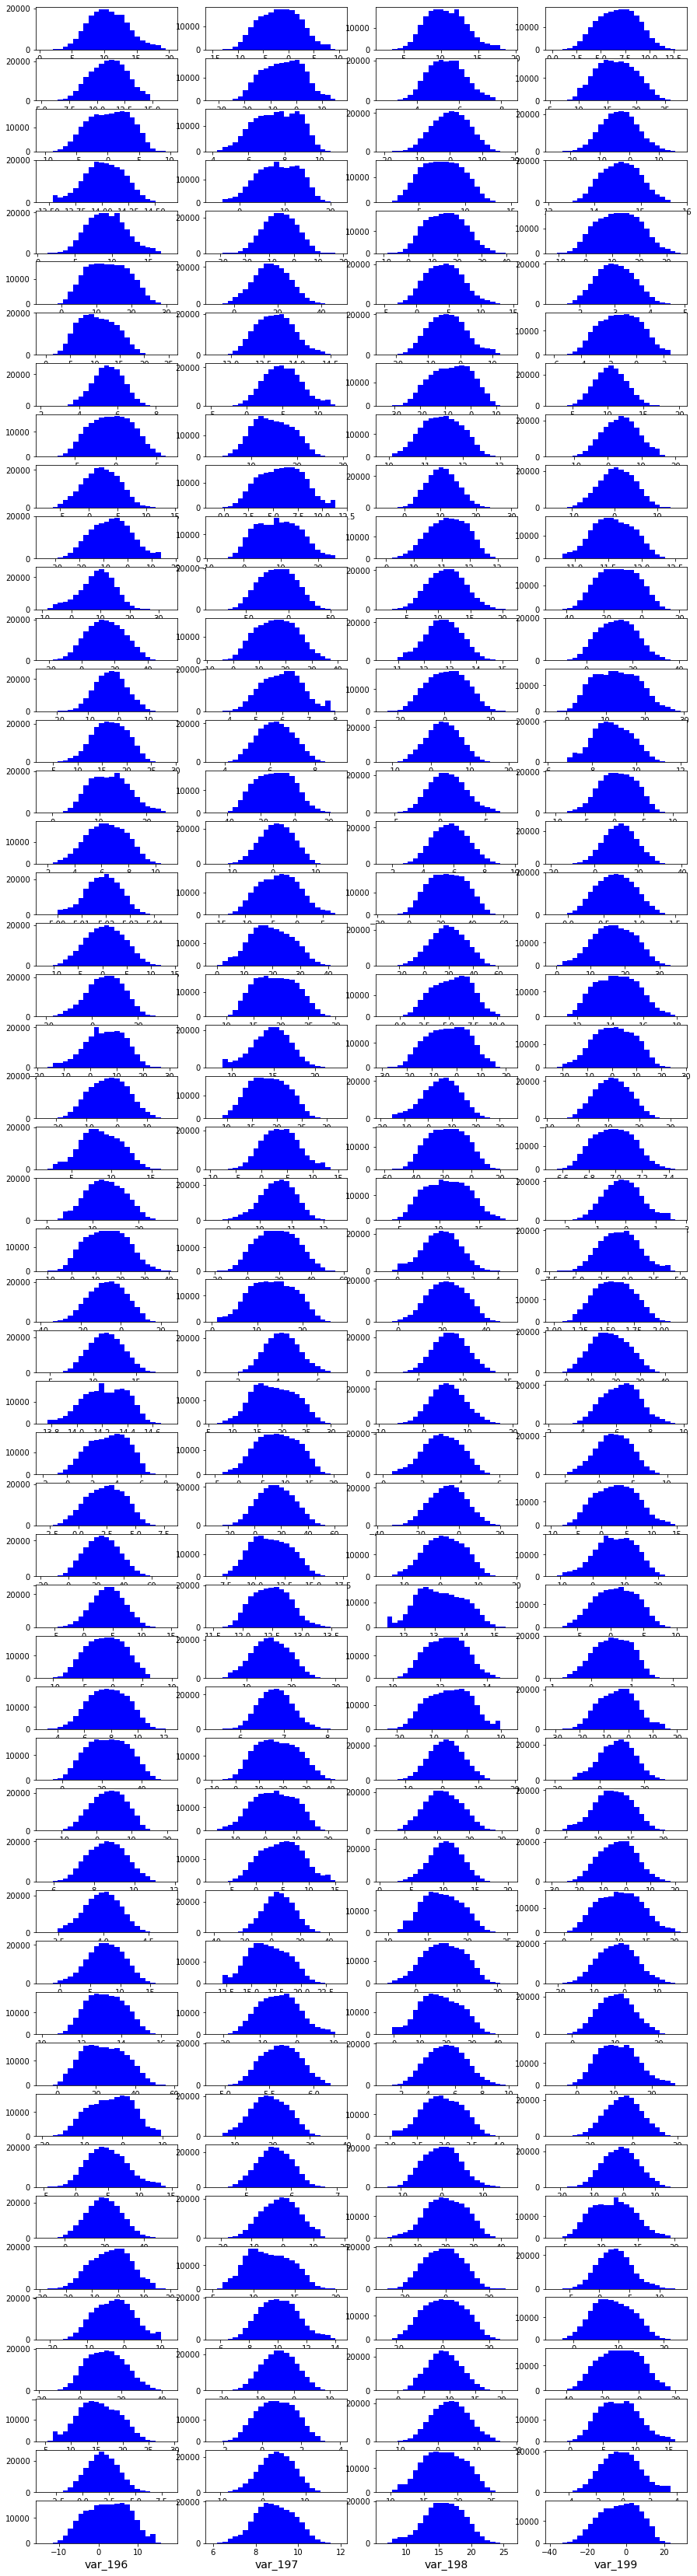

In [12]:
fig, axes = plt.subplots(50, 4, figsize=(15, 60))

for num, feature in enumerate(continuous_feature):
    data = train[feature].copy()
    axes[num//4, num%4].hist(data, bins=25, color="blue")
    axes[num//4, num%4].set_xlabel(feature, fontsize=14)

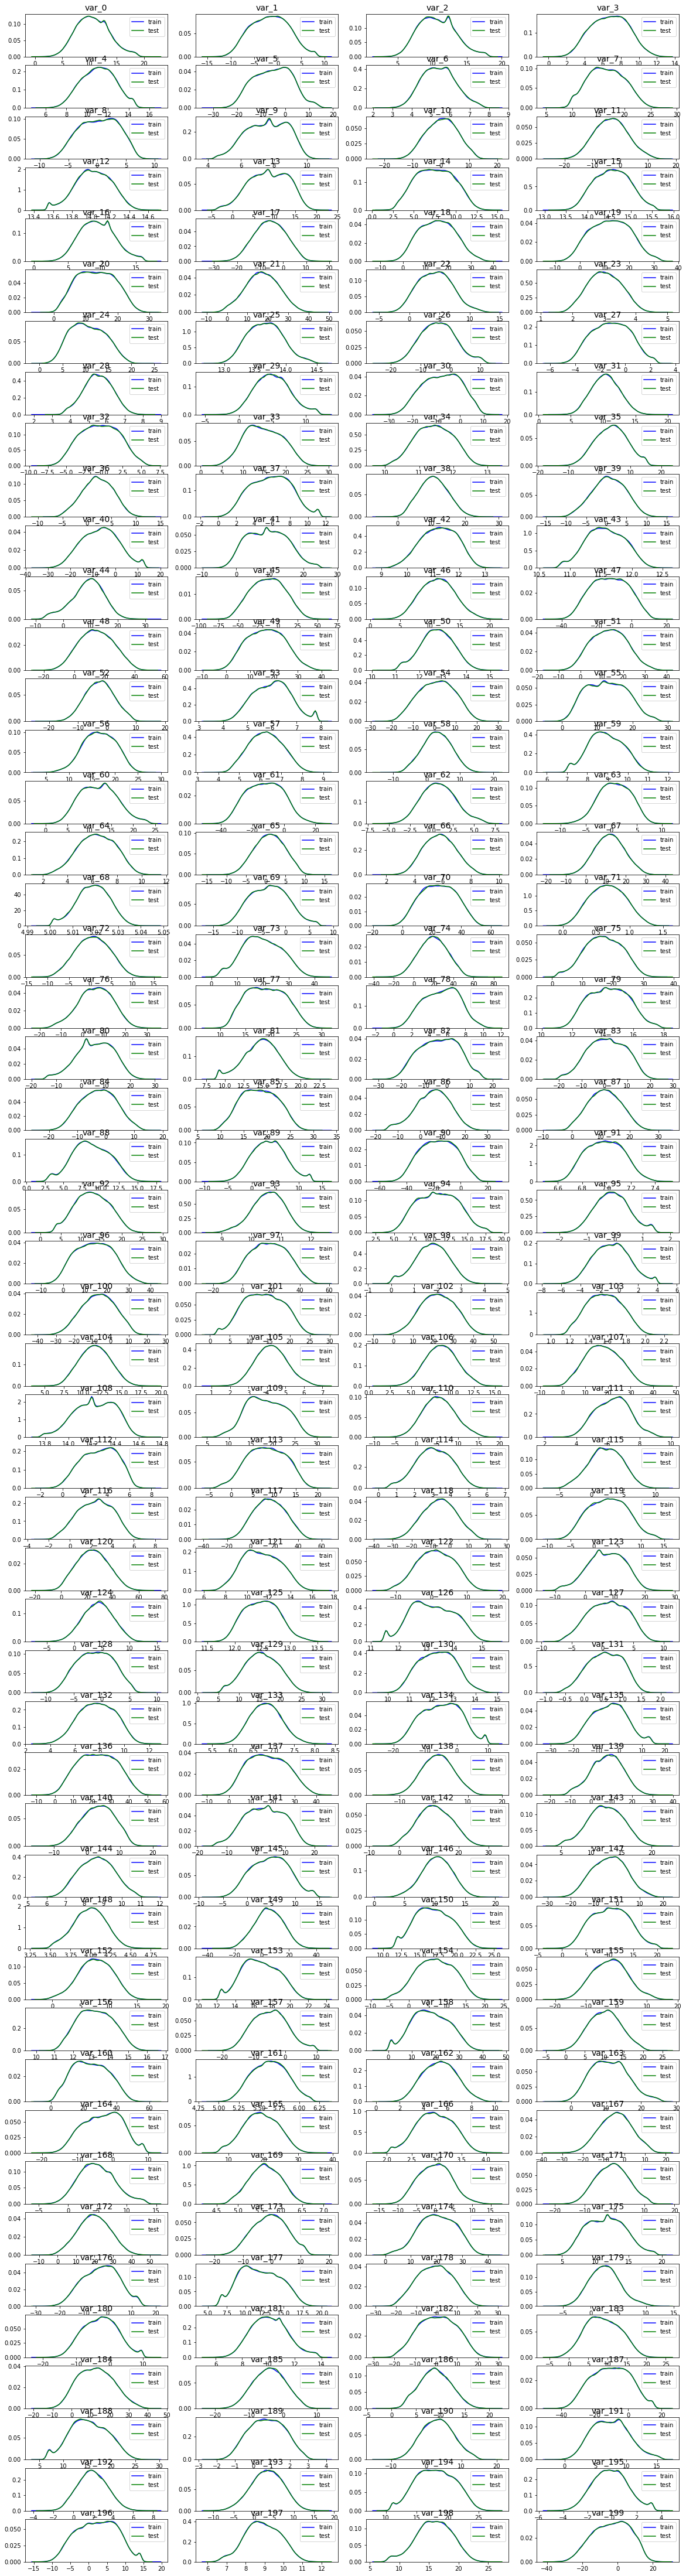

In [14]:
fig, axes = plt.subplots(50, 4, figsize=(20, 80))

for num, feature in enumerate(continuous_feature):
    try:
        train_data, test_data = train[feature].copy(), test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
        sns.kdeplot(test_data, ax=axes[num//4, num%4], color="green", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
    axes[num//4, num%4].set_title(feature, fontsize=14)

### Анализ пропусков

In [21]:
# Пропусков нет

## Выводы по базовому анализу данных:
Обучающая выборка содержит 200000 строк и 202 столбца. Из которых столбец ID_code исключаем, столбец target - целевая переменная, остальные столбцы - являются непрерывными признаками. Непрерывные признаки имеют похожее распределение, визульно близкое к нормальному. Пропуски отсутствуют.

## Базовый анализ целевой переменной

### Анализ распределения целевой переменной

<AxesSubplot:title={'center':'Log Normal'}, xlabel='target'>

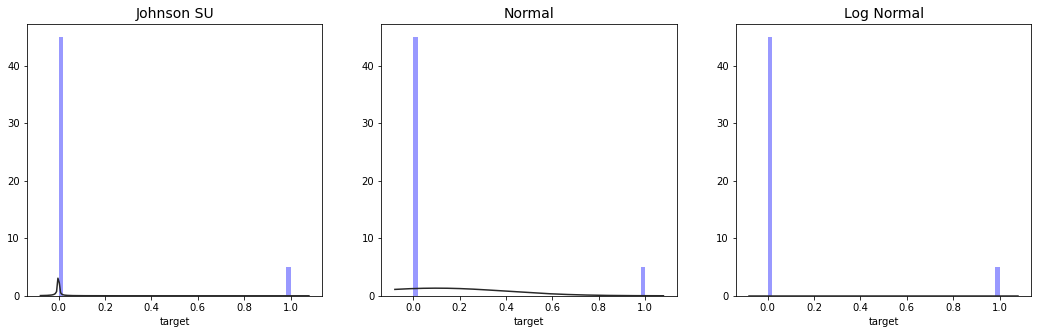

In [27]:
target = train["target"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].set_title("Johnson SU", fontsize=14)
sns.distplot(target, kde=False, color="blue", fit=st.johnsonsu, ax=axes[0])

axes[1].set_title("Normal", fontsize=14)
sns.distplot(target, kde=False, color="blue", fit=st.norm, ax=axes[1])

axes[2].set_title("Log Normal", fontsize=14)
sns.distplot(target, kde=False, color="blue", fit=st.lognorm, ax=axes[2])

## Вывод по базовому анализу целевой переменной

Очевидно, что целевая переменная принимает только 2 значения, поэтому анализ распределения был излишним. Единственное что можно извлечь из графиков, то, что у нас сильный перекос в сторону значения 0. 

## Распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки

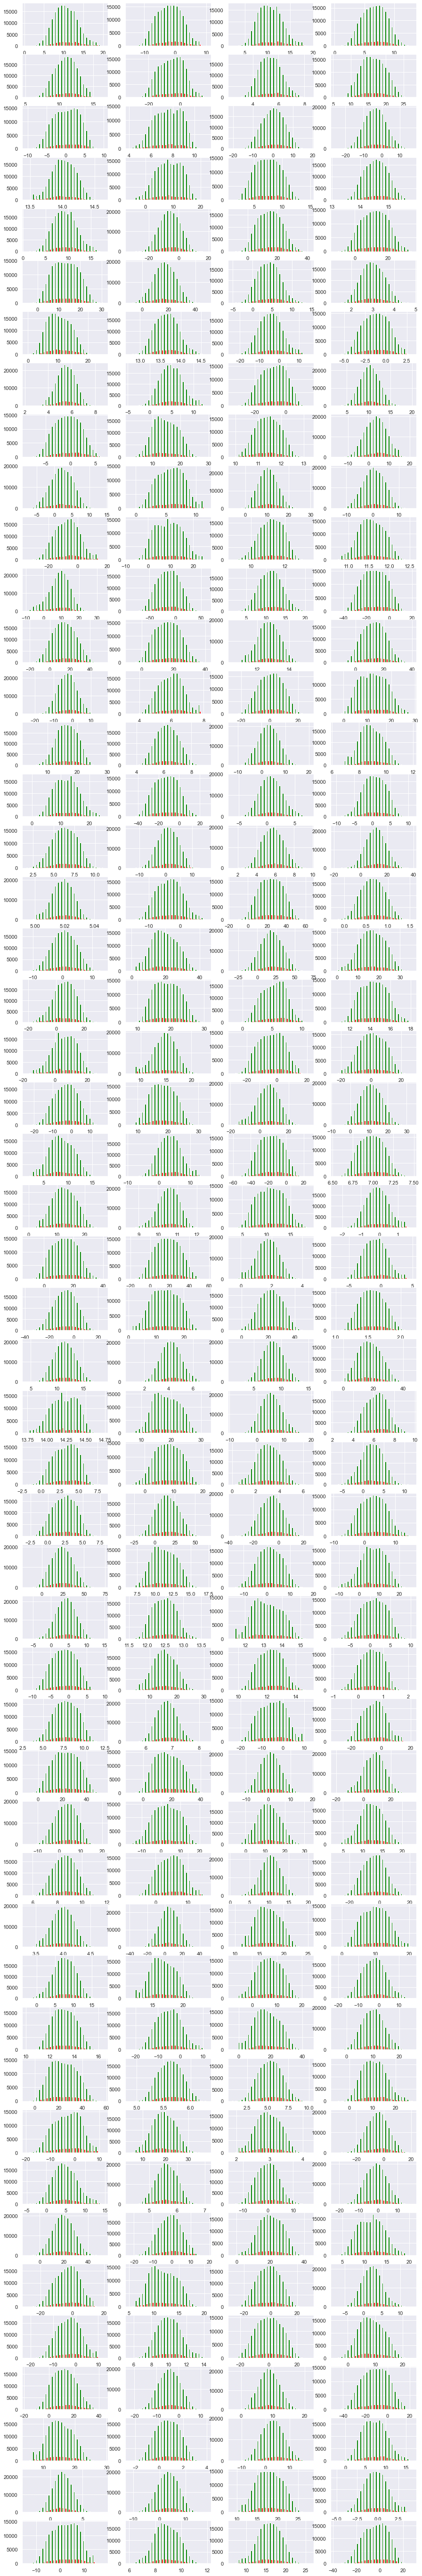

In [67]:
fig, axes = plt.subplots(50, 4, figsize=(15, 100))

for num, feature in enumerate(continuous_feature):
    axes[num//4, num%4].hist([train[train['target']==0][feature], 
                              train[train['target']==1][feature]], bins=25, color=['green', 'red'])

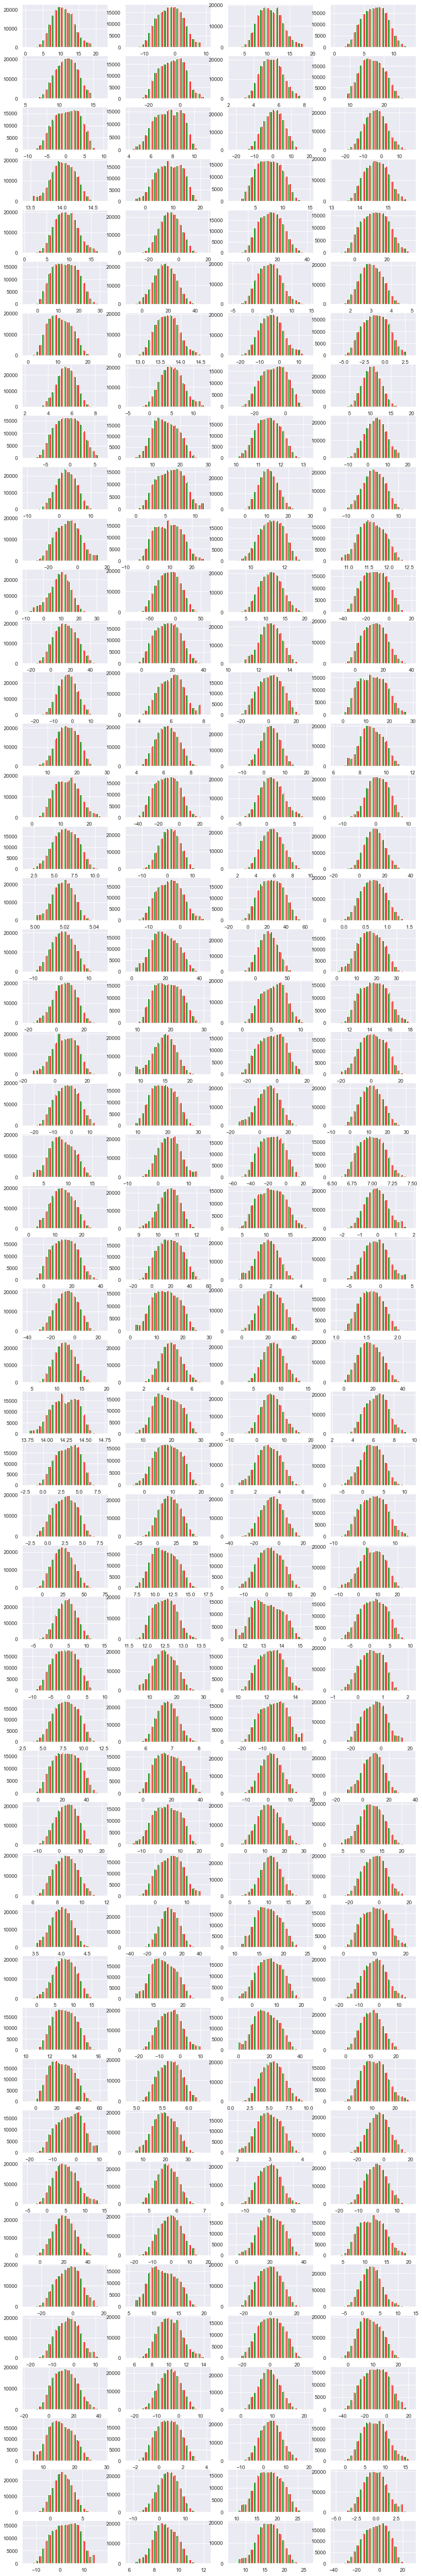

In [68]:
fig, axes = plt.subplots(50, 4, figsize=(15, 100))

for num, feature in enumerate(continuous_feature):
    axes[num//4, num%4].hist([train[feature], test[feature]], bins=25, color=['green', 'red'])

## Выводы по распределению признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки

Распределение признаков в зависимости от значения целевой переменной в основном различное.
Распределение признаков для обучающей и тестовой выборки одинаковое.

## Распределение основных статистик признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки

In [75]:
x0 = []
y0 = []
e0 = []
x1 = []
y1 = []
e1 = []
xtr = []
ytr = []
etr = []
xts = []
yts = []
ets = []

for num, feature in enumerate(continuous_feature):
    x0.append(feature)
    y0.append(train[train['target']==0][feature].mean())
    e0.append(train[train['target']==0][feature].std())
    x1.append(feature)
    y1.append(train[train['target']==1][feature].mean())
    e1.append(train[train['target']==1][feature].std())    
    xtr.append(feature)
    ytr.append(train[feature].mean())
    etr.append(train[feature].std())        
    xts.append(feature)
    yts.append(test[feature].mean())
    ets.append(test[feature].std())            

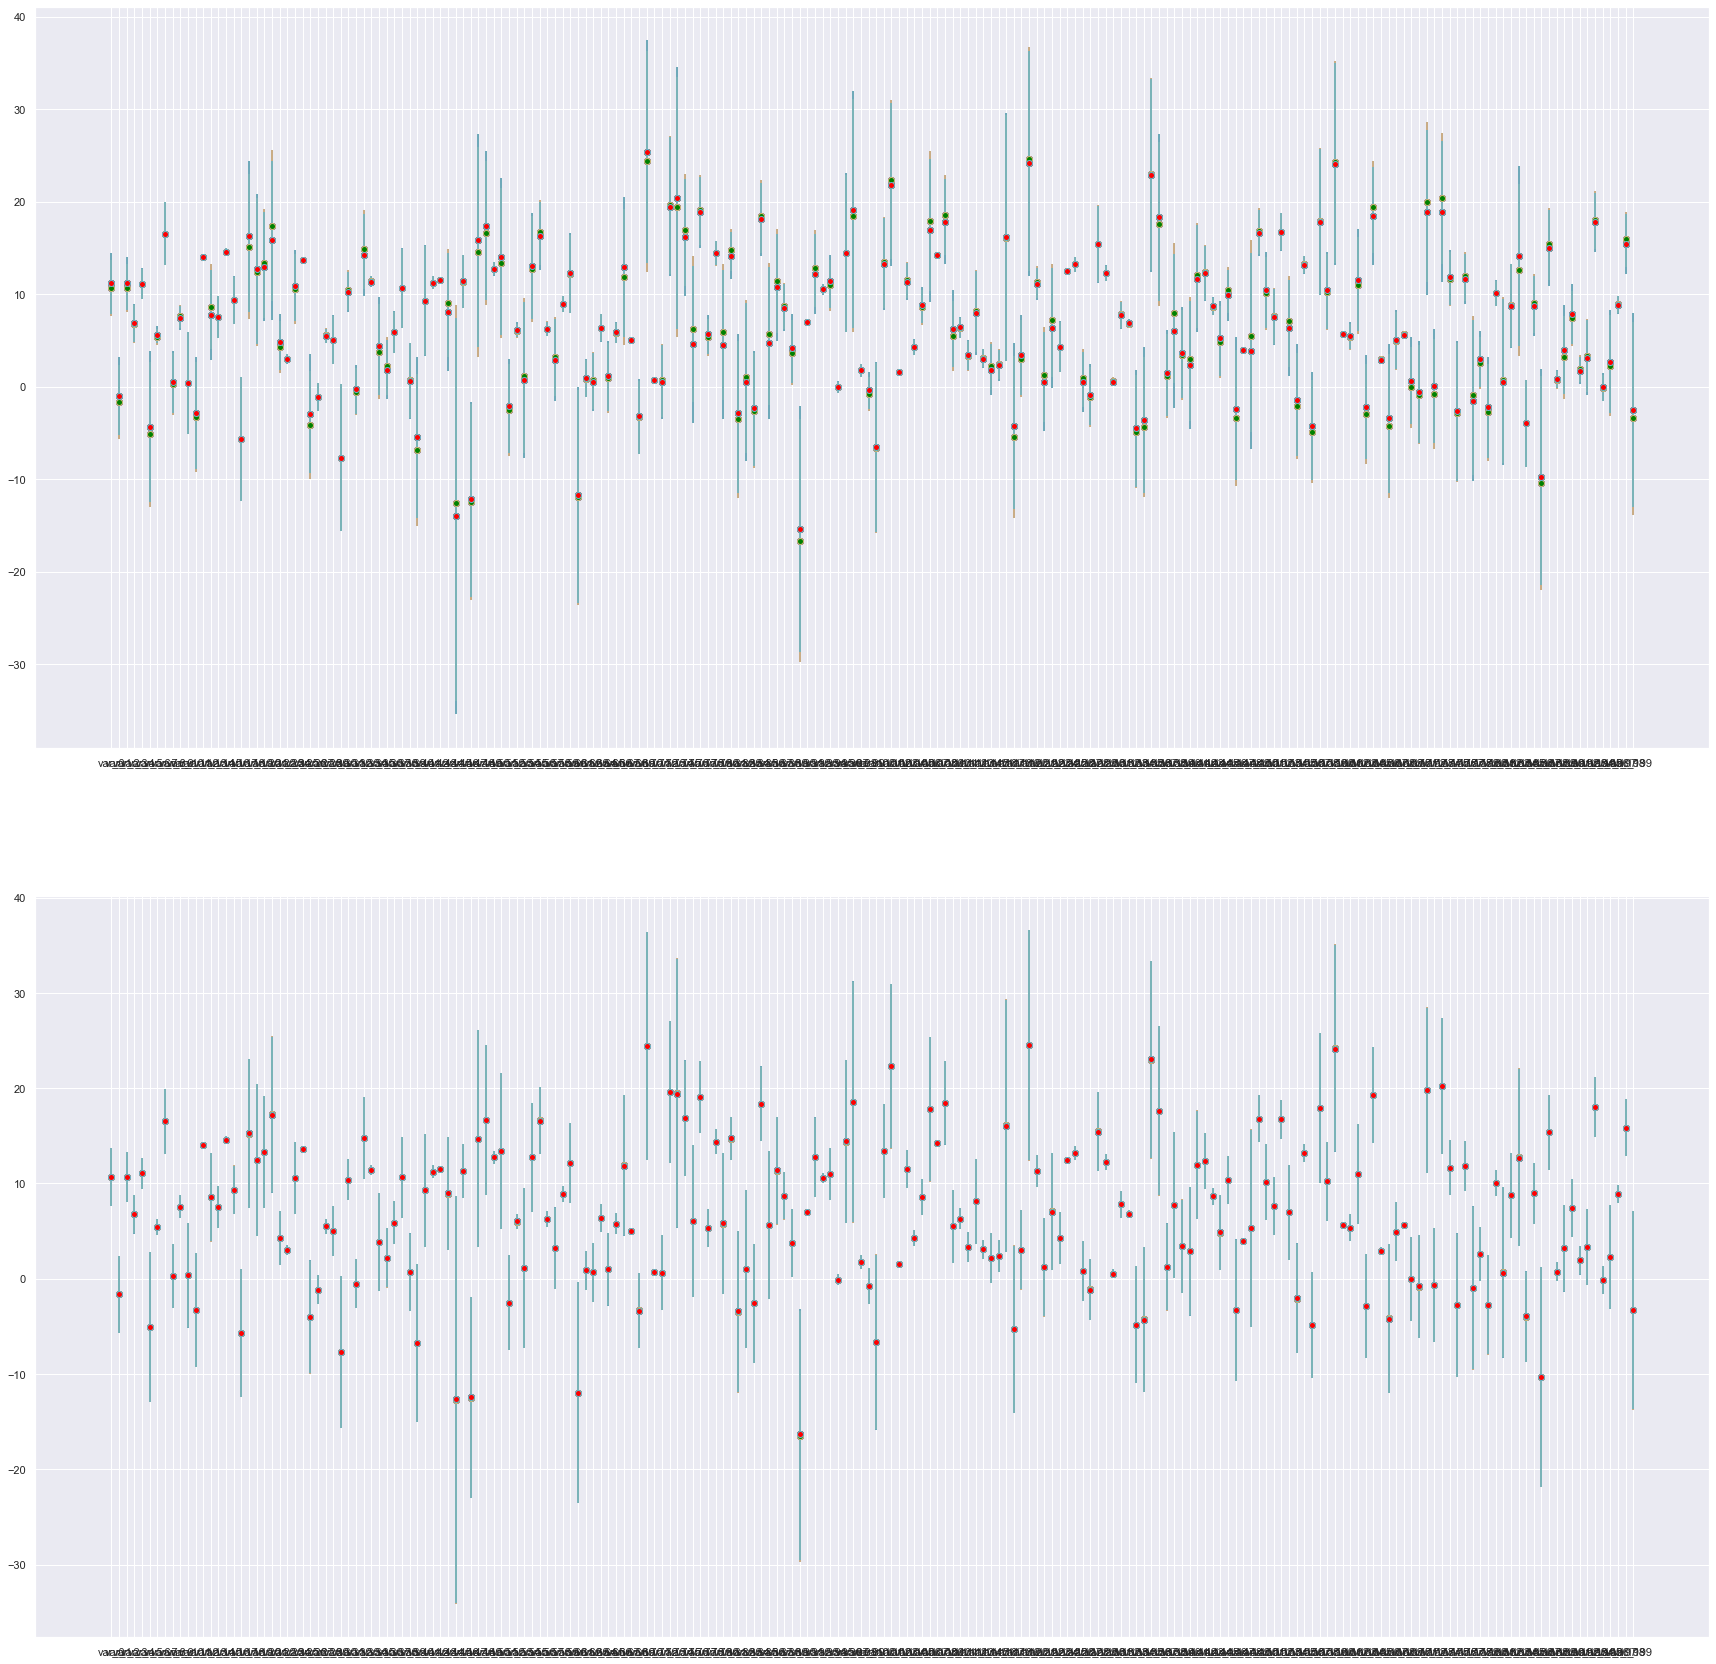

In [78]:
fig, axes = plt.subplots(2, 1, figsize=(30, 30))

for num, feature in enumerate(continuous_feature):
    axes[0].errorbar(x0, y0, e0, linestyle='None', mfc='green', label='target=0', fmt='-o')
    axes[0].errorbar(x1, y1, e1, linestyle='None', mfc='red', label='target=1', fmt='-o')    
    axes[1].errorbar(xtr, ytr, etr, linestyle='None', mfc='green', label='train', fmt='-o')        
    axes[1].errorbar(xts, yts, ets, linestyle='None', mfc='red', label='test', fmt='-o')            

## Выводы по распределению основных статистик признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки

Основные статистики в разрезе целевой переменной различаются. Основные статистики для обучающей и тестовой выборок выглядят очень похожими.

## Распределение коэффициентов корреляции между признаками

### Корреляция между числовыми признаками

In [28]:
correlation = numerical_features.corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
cor_with_target

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
             ...   
var_76    -0.061917
var_146   -0.063644
var_12    -0.069489
var_139   -0.074080
var_81    -0.080917
Name: target, Length: 201, dtype: float64

Text(0, 0.5, 'Density')

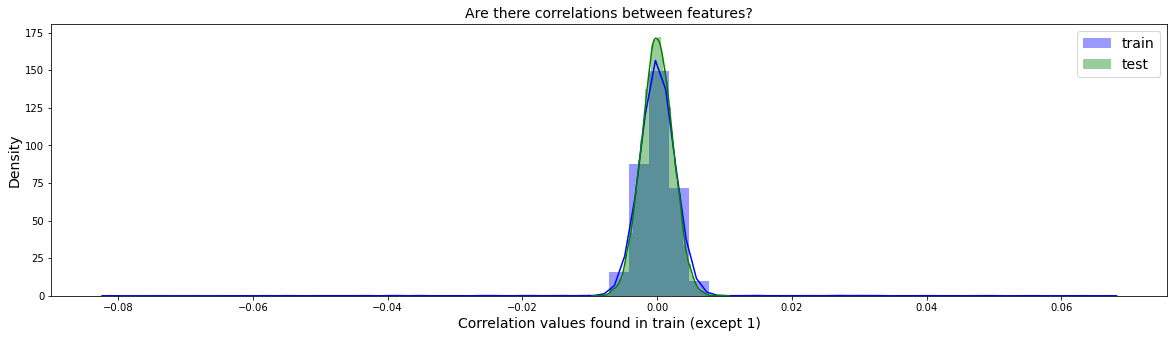

In [29]:
train_correlations = numerical_features.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = numerical_features.columns.tolist()
columns.remove("target")

test_correlations = test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

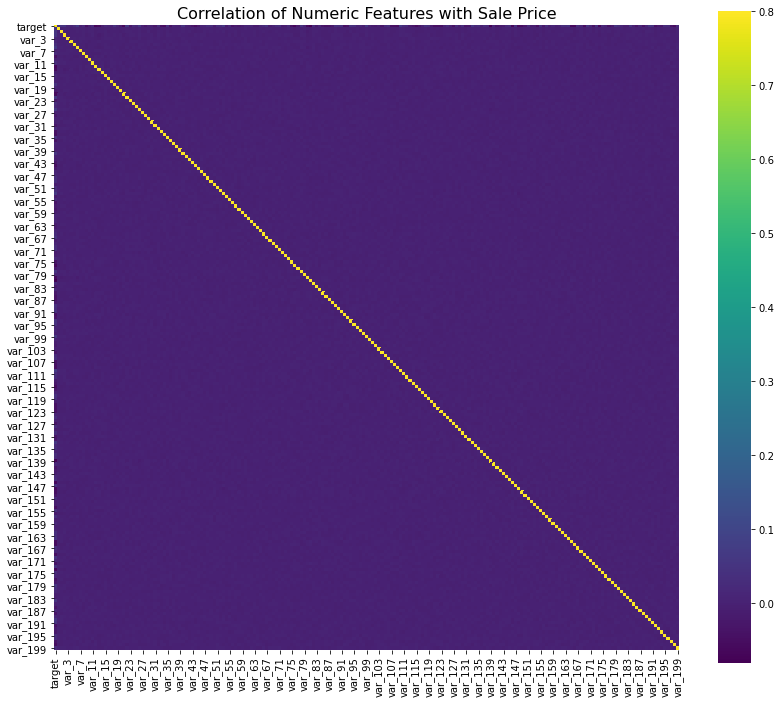

In [30]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

<AxesSubplot:>

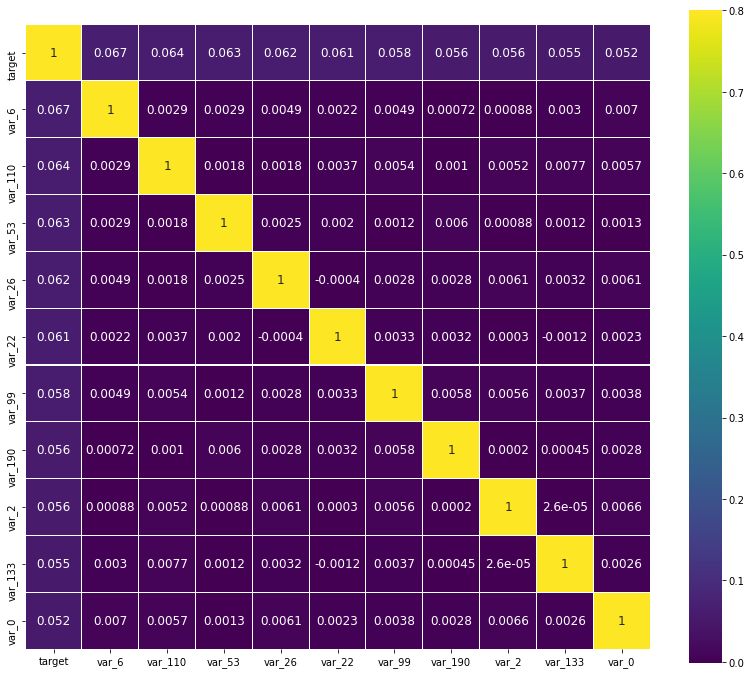

In [32]:
k = 11
cols = correlation.nlargest(k, "target")["target"].index
cm = np.corrcoef(train[cols].values.T)
fig, axes = plt.subplots(figsize = (14, 12))

sns.heatmap(
    cm,
    vmax=.8,
    linewidths=0.01,
    cmap="viridis",
    square=True,
    annot=True,
    linecolor="white",
    xticklabels=cols.values,
    annot_kws = {"size": 12},
    yticklabels=cols.values
)

#### Вывод: линейная корреляция не была обнаружена

### Нелинейная связь между признаками

In [34]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestRegressor(**parameters)
forest.fit(numerical_features.fillna(-9999).drop("target", axis=1), target)

Wall time: 3min 31s


RandomForestRegressor(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

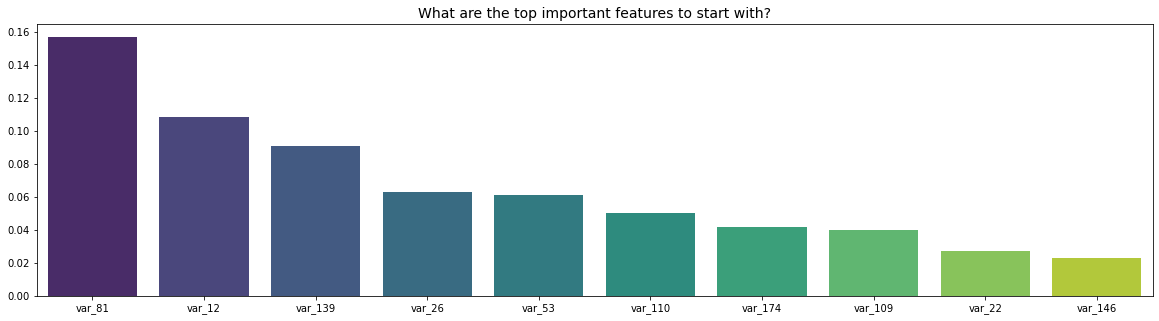

In [35]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features.drop("target", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

#### Перые 10 признаков с наибольшей нелинейной связью с целевой переменной: var_81, var_12, var_139, var_26, var_53, var_110, var_174, var_109, var_22, var_146

### Pair Plot

PairPlor между SalePrice и высоко-коррелированными переменными. Строим этот график для лучшего понимания характерика связи между целевой переменной и признаком. С помощью корреляционной матрицы мы установили что связь между определенными признаками и целевой переменной есть, но характер этой связи пока остается невыясненным. Строим PairPlot для лучшего понимания характера этой связи;

C:\Users\rseme\anaconda3\envs\tf2-gpu-nv\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


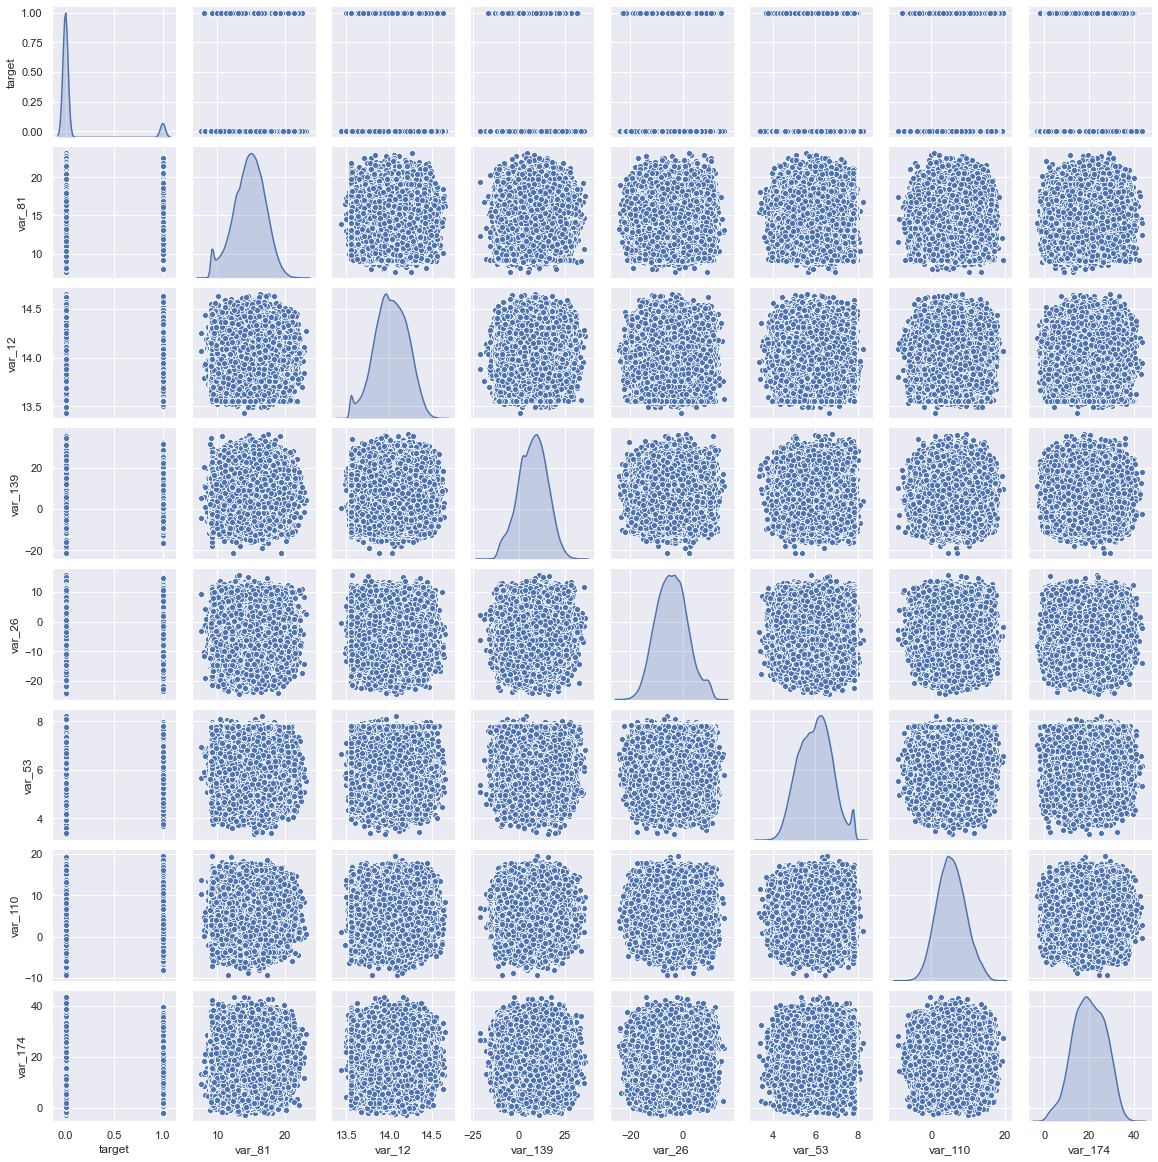

In [37]:
sns.set()
columns = [
    "target",
    "var_81",
    "var_12",
    "var_139",
    "var_26",
    "var_53",
    "var_110",
    "var_174"
]

sns.pairplot(train[columns], size=2, kind="scatter", diag_kind="kde")
plt.show()

#### Явных зависимостей на графике не удалось обнаружить. Выглядит как шум с распределением близким к нормальному.

## Kolmogorov-Smirnov Test

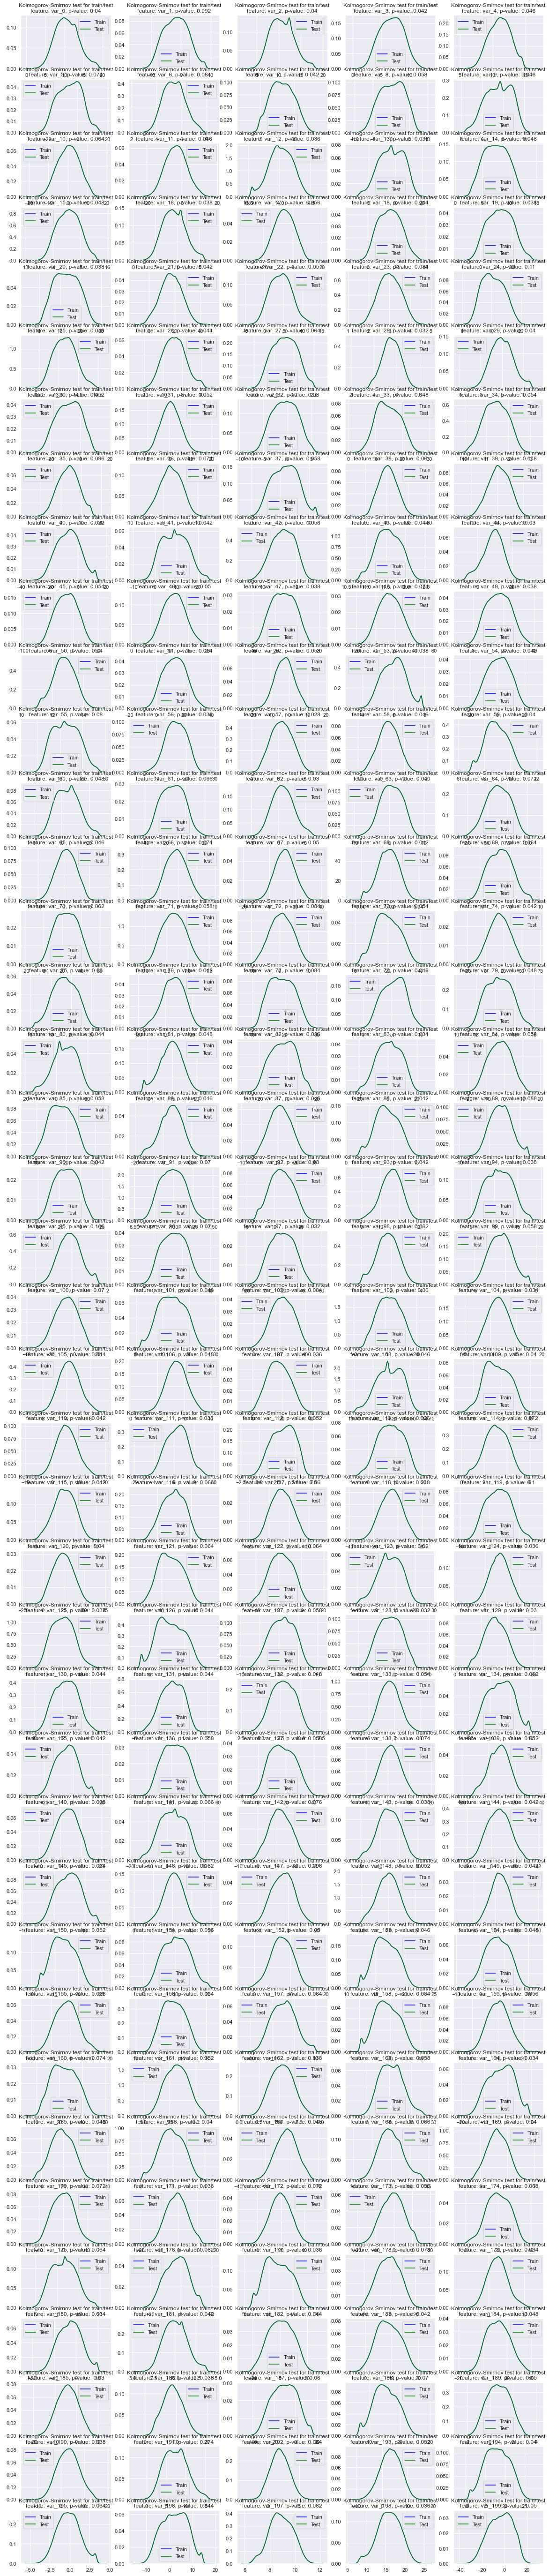

In [81]:
statistics_array = []
fig, axes = plt.subplots(40, 5, figsize=(20, 100))

for num, feature in enumerate(continuous_feature):
    statistic, pvalue = ks_2samp(
        train[feature].sample(500), test[feature].sample(500)
    )
    statistics_array.append(statistic)

    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Blue", label="Train")
    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Green", label="Test")

    axes[num//5, num%5].set_title(
        (f"Kolmogorov-Smirnov test for train/test\n"
        f"feature: {feature}, p-value: {round(statistic, 3)}")
    )

### Вывод: распределения признаков на обучающей и тестовой выборках идентичны